In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bollywood-movie-dataset/BollywoodActorRanking.csv
/kaggle/input/bollywood-movie-dataset/BollywoodDirectorRanking.csv
/kaggle/input/bollywood-movie-dataset/BollywoodMovieDetail.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/bollywood-movie-dataset/BollywoodMovieDetail.csv'
data = pd.read_csv(file_path)

# Convert releaseDate to datetime
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')

# Extract the release year
#data['releaseYear'] = data['releaseDate'].dt.year

# Split genres and actors into lists
data['genre'] = data['genre'].str.split(' \|')
data['actors'] = data['actors'].str.split(' \| ')  # Splitting by ' | ' to handle the format
actor_data = data.explode('actors')
# Explode the lists into separate rows for genres and actors
genre_data = data.explode('genre')
#actor_data = data.explode('actors')


In [3]:
actor_data

imdbId                              title  releaseYear releaseDate  \
0     tt0118578                             Albela         2001  2001-04-20   
0     tt0118578                             Albela         2001  2001-04-20   
0     tt0118578                             Albela         2001  2001-04-20   
0     tt0118578                             Albela         2001  2001-04-20   
1     tt0169102  Lagaan: Once Upon a Time in India         2001  2002-05-08   
...         ...                                ...          ...         ...   
1282  tt4219300                    Gollu aur Pappu         2014  2014-11-21   
1283  tt4228746                                Zid         2014  2014-11-28   
1283  tt4228746                                Zid         2014  2014-11-28   
1283  tt4228746                                Zid         2014  2014-11-28   
1283  tt4228746                                Zid         2014  2014-11-28   

                              genre  \
0                         [Romance]   
0                         [Romance]   
0                         [Romance]   
0                         [Romance]   
1     [Adventure,  Drama,  Musical]   
...                             ...   
1282                       [Comedy]   
1283                     [Thriller]   
1283                     [Thriller]   
1283                     [Thriller]   
1283                     [Thriller]   

                                                writers  \
0     Honey Irani (screenplay) | Honey Irani (story)...   
0     Honey Irani (screenplay) | Honey Irani (story)...   
0     Honey Irani (screenplay) | Honey Irani (story)...   
0     Honey Irani (screenplay) | Honey Irani (story)...   
1     Ashutosh Gowariker (story) | Ashutosh Gowarike...   
...                                                 ...   
1282                                                NaN   
1283                   Vivek Agnihotri | Rohit Malhotra   
1283                   Vivek Agnihotri | Rohit Malhotra   
1283                   Vivek Agnihotri | Rohit Malhotra   
1283                   Vivek Agnihotri | Rohit Malhotra   

                      actors                       directors  sequel  hitFlop  
0                    Govinda                   Deepak Sareen     0.0        2  
0     Aishwarya Rai Bachchan                   Deepak Sareen     0.0        2  
0              Jackie Shroff                   Deepak Sareen     0.0        2  
0          Namrata Shirodkar                   Deepak Sareen     0.0        2  
1                 Aamir Khan              Ashutosh Gowariker     0.0        6  
...                      ...                             ...     ...      ...  
1282          Dimple Kapadia                  Kabir Sadanand     0.0        1  
1283             Shradha Das  Rohit Malhotra | Anubhav Sinha     0.0        2  
1283            Mohan Kapoor  Rohit Malhotra | Anubhav Sinha     0.0        2  
1283                 Mannara  Rohit Malhotra | Anubhav Sinha     0.0        2  
1283         Karanvir Sharma  Rohit Malhotra | Anubhav Sinha     0.0        2  

[5102 rows x 10 columns]

# Temporal Analysis by Genre

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


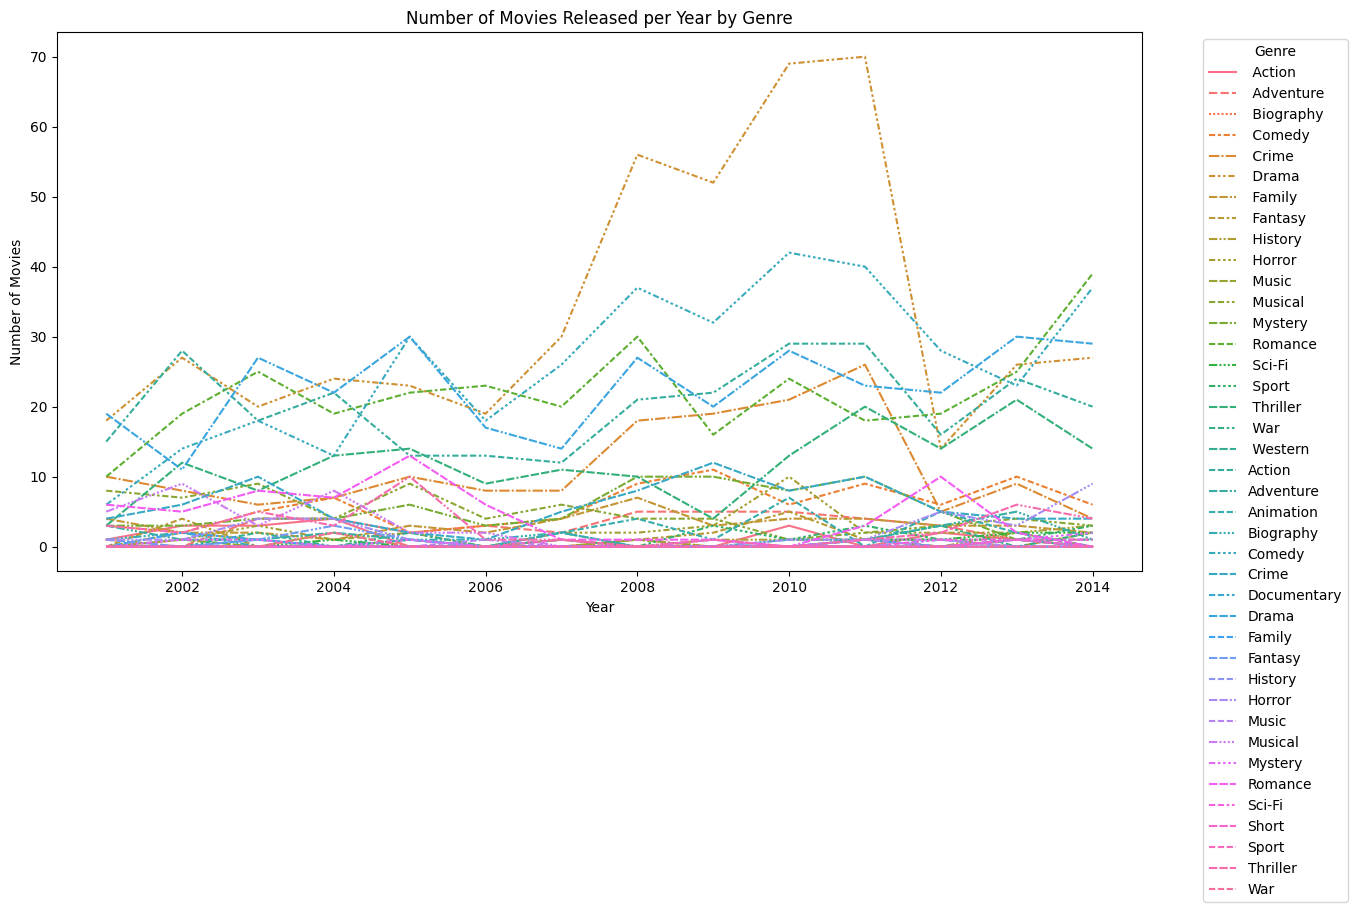

In [4]:
 
genre_count_per_year = genre_data.groupby(['releaseYear', 'genre']).size().unstack().fillna(0)
plt.figure(figsize=(14, 7))
sns.lineplot(data=genre_count_per_year)
plt.title('Number of Movies Released per Year by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [5]:
total_movies_per_genre = genre_data['genre'].value_counts()
most_successful_genre = total_movies_per_genre.idxmax()
print(f"The most common genre is: {most_successful_genre}")

The most common genre is:  Drama


In [6]:

genre_counts_per_year = genre_data.groupby(['releaseYear', 'genre']).size()
top_genres_per_year = genre_counts_per_year.groupby(level=0, group_keys=False).nlargest(5)

# Print top 5 genres per year
print("Top 5 Genres per Year:")
for year, group in top_genres_per_year.groupby(level=0):
    print(f"\nYear: {year}")
    print(group.droplevel(0).sort_values(ascending=False))


Top 5 Genres per Year:

Year: 2001
genre
Drama       19
 Drama      18
Action      15
 Crime      10
 Romance    10
dtype: int64

Year: 2002
genre
Action       28
 Drama       27
 Romance     19
Comedy       14
 Thriller    12
dtype: int64

Year: 2003
genre
Drama       27
 Romance    25
 Drama      20
Action      18
Comedy      18
dtype: int64

Year: 2004
genre
 Drama       24
Action       22
Drama        22
 Romance     19
 Thriller    13
dtype: int64

Year: 2005
genre
Comedy       30
Drama        30
 Drama       23
 Romance     22
 Thriller    14
dtype: int64

Year: 2006
genre
 Romance    23
 Drama      19
Comedy      18
Drama       17
Action      13
dtype: int64

Year: 2007
genre
 Drama      30
Comedy      26
 Romance    20
Drama       14
Action      12
dtype: int64

Year: 2008
genre
 Drama      56
Comedy      37
 Romance    30
Drama       27
Action      21
dtype: int64

Year: 2009
genre
 Drama    52
Comedy    32
Action    22
Drama     20
 Crime    19
dtype: int64

Year: 2010
genre


# Temporal Analysis of Actors

In [7]:
top_actors = actor_data['actors'].value_counts().head(15).index
top_actor_data = actor_data[actor_data['actors'].isin(top_actors)]

# Temporal analysis for top actors
top_actor_count_per_year = actor_data.groupby(['releaseYear', 'actors']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_actor_count_per_year)
plt.title('Number of Movies Released per Year by Top Actors')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Actors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [8]:
total_movies_per_actor = top_actor_data['actors'].value_counts()
most_common_actor = total_movies_per_actor.idxmax()
print(f"The actor with most movies is: {most_common_actor}")

The actor with most movies is: Akshay Kumar


In [9]:
actor_counts_per_year = actor_data.groupby(['releaseYear', 'actors']).size()
top_actors_per_year = actor_counts_per_year.groupby(level=0, group_keys=False).nlargest(5)

print("\nTop 5 Actors per Year:")
for year, group in top_actors_per_year.groupby(level=0):
    print(f"\nYear: {year}")
    print(group.droplevel(0).sort_values(ascending=False))


Top 5 Actors per Year:

Year: 2001
actors
Jackie Shroff         7
Amrish Puri           5
Govinda               4
Mithun Chakraborty    4
Preity Zinta          4
dtype: int64

Year: 2002
actors
Ashutosh Rana       6
Ameesha Patel       5
Sanjay Dutt         5
Sunil Shetty        5
Aftab Shivdasani    4
dtype: int64

Year: 2003
actors
Ajay Devgn           7
Gulshan Grover       6
Sunil Shetty         6
Amitabh Bachchan     5
Abhishek Bachchan    4
dtype: int64

Year: 2004
actors
Akshay Kumar         8
Amitabh Bachchan     8
Sunil Shetty         7
Abhishek Bachchan    5
Bipasha Basu         5
dtype: int64

Year: 2005
actors
Amitabh Bachchan     8
Ajay Devgn           7
Akshay Kumar         6
Sanjay Dutt          6
Abhishek Bachchan    5
dtype: int64

Year: 2006
actors
Akshay Kumar      6
Ameesha Patel     6
Gulshan Grover    5
Paresh Rawal      5
Arshad Warsi      4
dtype: int64

Year: 2007
actors
Amitabh Bachchan    5
Akshay Kumar        4
Bobby Deol          4
Jimmy Shergill      4
Sa

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


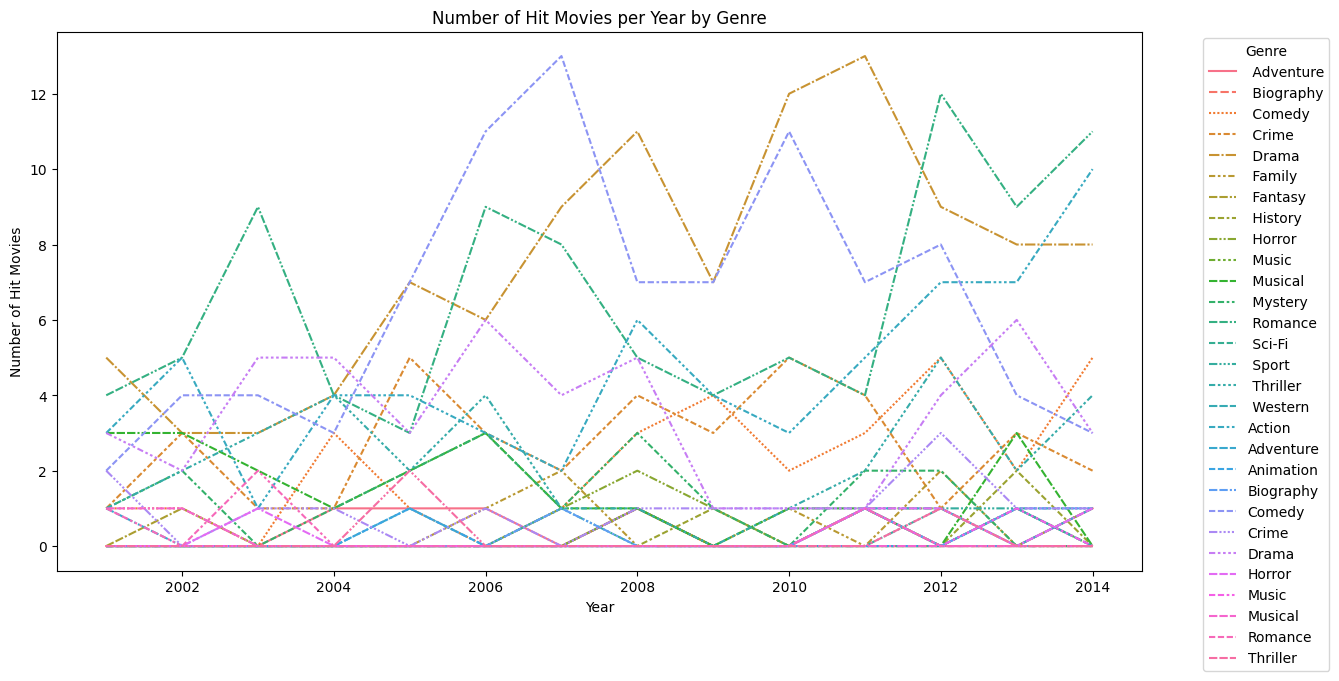

In [10]:

hit_movies = data[data['hitFlop'] > 3]
hit_genre_data = hit_movies.explode('genre')
hit_genre_count_per_year = hit_genre_data.groupby(['releaseYear', 'genre']).size().unstack().fillna(0)
plt.figure(figsize=(14, 7))
sns.lineplot(data=hit_genre_count_per_year)
plt.title('Number of Hit Movies per Year by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Hit Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [11]:
total_hits_per_genre = hit_genre_data['genre'].value_counts()
most_successful_genre = total_hits_per_genre.idxmax()
print(f"The most successful genre is: {most_successful_genre}")

The most successful genre is:  Drama


In [12]:

data=pd.read_csv("/kaggle/input/bollywood-movie-dataset/BollywoodMovieDetail.csv")
# Filter hit movies
hit_movies = data[data['hitFlop'] > 3]
hit_actor_data = hit_movies.explode('actors')

In [13]:
hit_actor_data 

imdbId                              title  releaseYear  releaseDate  \
1     tt0169102  Lagaan: Once Upon a Time in India         2001  08 May 2002   
3     tt0222024             Hum Tumhare Hain Sanam         2002  24 May 2002   
5     tt0238936                             Devdas         2002  12 Jul 2002   
7     tt0248126        Kabhi Khushi Kabhie Gham...         2001  14 Dec 2001   
11    tt0256692          Chori Chori Chupke Chupke         2001  09 Mar 2001   
...         ...                                ...          ...          ...   
1229  tt3382148                           Yaariyan         2014  10 Jan 2014   
1230  tt3390572                             Haider         2014  02 Oct 2014   
1239  tt3495000                           Mardaani         2014  22 Aug 2014   
1255  tt3619772                       Hate Story 2         2014  18 Jul 2014   
1261  tt3678938          Humpty Sharma Ki Dulhania         2014  11 Jul 2014   

                            genre  \
1     Adventure | Drama | Musical   
3                 Drama | Romance   
5               Musical | Romance   
7       Drama | Musical | Romance   
11      Drama | Musical | Romance   
...                           ...   
1229              Drama | Romance   
1230      Crime | Drama | Romance   
1239    Action | Drama | Thriller   
1255   Drama | Romance | Thriller   
1261     Comedy | Drama | Romance   

                                                writers  \
1     Ashutosh Gowariker (story) | Ashutosh Gowarike...   
3     K.S. Adiyaman | Arun Kumar (assistant dialogue...   
5     Saratchandra Chatterjee (based on the novel by...   
7              Karan Johar | Sheena Parikh (screenplay)   
11    Shyam Goel (screenplay) | Javed Siddiqui (dial...   
...                                                 ...   
1229                                                NaN   
1230  William Shakespeare (based on the play "Hamlet...   
1239                                       Gopi Puthran   
1255  Madhuri Banerjee (screenplay) | Girish Dhamija...   
1261                                   Shashank Khaitan   

                                                 actors  \
1     Aamir Khan | Gracy Singh | Rachel Shelley | Pa...   
3     Shah Rukh Khan | Madhuri Dixit | Salman Khan |...   
5     Shah Rukh Khan | Madhuri Dixit | Aishwarya Rai...   
7     Amitabh Bachchan | Jaya Bhaduri | Shah Rukh Kh...   
11    Preity Zinta | Salman Khan | Rani Mukerji | Am...   
...                                                 ...   
1229  Himansh Kohli | Vivek Bhatnagar | Nicole Faria...   
1230  Tabu | Shahid Kapoor | Shraddha Kapoor | Kay K...   
1239  Rani Mukerji | Tahir Raj Bhasin | Gautam Babba...   
1255  Sushant Singh | Surveen Chawla | Jay Bhanushal...   
1261  Varun Dhawan | Alia Bhatt | Sidharth Shukla | ...   

                                              directors  sequel  hitFlop  
1                                    Ashutosh Gowariker     0.0        6  
3                                         K.S. Adiyaman     0.0        4  
5                                 Sanjay Leela Bhansali     0.0        6  
7                                           Karan Johar     0.0        8  
11    Abbas Alibhai Burmawalla | Mastan Alibhai Burm...     0.0        5  
...                                                 ...     ...      ...  
1229                                       Divya Khosla     0.0        4  
1230                                    Vishal Bhardwaj     0.0        4  
1239                                     Pradeep Sarkar     0.0        4  
1255                                      Vishal Pandya     2.0        4  
1261                                   Shashank Khaitan     0.0        6  

[243 rows x 10 columns]

In [14]:

hit_actor_counts_per_year = hit_actor_data.groupby(['releaseYear', 'actors']).size()
top_actors_per_year = hit_actor_counts_per_year.groupby(level=0).idxmax()
print("Most Successful Actors per Year:")
for year, actor in top_actors_per_year.items():
    print(f"Year: {year}, Actor: {actor[1]}, Hit Movies: {hit_actor_counts_per_year[actor]}")


Most Successful Actors per Year:
Year: 2001, Actor: Aamir Khan | Gracy Singh | Rachel Shelley | Paul Blackthorne, Hit Movies: 1
Year: 2002, Actor: Ajay Devgn | Mohanlal | Manisha Koirala | Seema Biswas, Hit Movies: 1
Year: 2003, Actor: Ajay Devgn | Gracy Singh | Mohan Joshi | Yashpal Sharma, Hit Movies: 1
Year: 2004, Actor: Abhishek Bachchan | Uday Chopra | John Abraham | Esha Deol, Hit Movies: 1
Year: 2005, Actor: Abhishek Bachchan | Priyanka Chopra | Ritesh Deshmukh | Nana Patekar, Hit Movies: 1
Year: 2006, Actor: Aamir Khan | Kajol | Rishi Kapoor | Tabu, Hit Movies: 1
Year: 2007, Actor: Akshay Kumar | Katrina Kaif | Rishi Kapoor | Clive Standen, Hit Movies: 1
Year: 2008, Actor: Aamir Khan | Asin | Jiah Khan | Tinnu Anand, Hit Movies: 1
Year: 2009, Actor: Aamir Khan | Kareena Kapoor | Madhavan | Sharman Joshi, Hit Movies: 1
Year: 2010, Actor: Ajay Devgn | Konkona Sen Sharma | Paresh Rawal | Satish Kaushik, Hit Movies: 1
Year: 2011, Actor: Ajay Devgn | Kajal Agarwal | Prakash Raj | So

# Actors with highest number of blockbusters

In [15]:
hit_movies = data[data['hitFlop'] > 7]#definig 7 rating as the cutoff for blockbuster performance

# Explode the actors for hit movies

hit_actor_data = hit_movies.explode('actors')
hit_actor_counts_per_year = hit_actor_data.groupby(['releaseYear', 'actors']).size()

# Get the most successful actor for each year
top_actors_per_year = hit_actor_counts_per_year.groupby(level=0).idxmax()

# Print the most successful actors per year
print("Most Successful Actors per Year:")
for year, actor in top_actors_per_year.items():
    print(f"Year: {year}, Actor: {actor[1]}, Blockbuster Movies: {hit_actor_counts_per_year[actor]}")


Most Successful Actors per Year:
Year: 2001, Actor: Amitabh Bachchan | Jaya Bhaduri | Shah Rukh Khan | Kajol, Blockbuster Movies: 1
Year: 2006, Actor: Abhishek Bachchan | Uday Chopra | Hrithik Roshan | Aishwarya Rai Bachchan, Blockbuster Movies: 1
Year: 2007, Actor: Shah Rukh Khan | Arjun Rampal | Kiron Kher | Shreyas Talpade, Blockbuster Movies: 1
Year: 2008, Actor: Aamir Khan | Asin | Jiah Khan | Tinnu Anand, Blockbuster Movies: 1
Year: 2009, Actor: Aamir Khan | Kareena Kapoor | Madhavan | Sharman Joshi, Blockbuster Movies: 1
Year: 2010, Actor: Mithun Chakraborty | Ajay Devgn | Kareena Kapoor | Tusshar Kapoor, Blockbuster Movies: 1
Year: 2011, Actor: Salman Khan | Asin | Paresh Rawal | Mahesh Manjrekar, Blockbuster Movies: 1
Year: 2012, Actor: Akshay Kumar | Sonakshi Sinha | Nasser | Paresh Ganatra, Blockbuster Movies: 1
Year: 2013, Actor: Aamir Khan | Katrina Kaif | Tabrett Bethell | Abhishek Bachchan, Blockbuster Movies: 1
Year: 2014, Actor: Aamir Khan | Anushka Sharma | Sanjay Dut

# Making blockbuster combinations

**Overall**

In [16]:
import pandas as pd

actor_ranking_df = pd.read_csv('/kaggle/input/bollywood-movie-dataset/BollywoodActorRanking.csv')
director_ranking_df = pd.read_csv('/kaggle/input/bollywood-movie-dataset/BollywoodDirectorRanking.csv')
movie_detail_df = pd.read_csv('/kaggle/input/bollywood-movie-dataset/BollywoodMovieDetail.csv')

top_actors = actor_ranking_df.nlargest(5, 'normalizedRating')
top_directors = director_ranking_df.nlargest(5, 'normalizedRating')

successful_movies = movie_detail_df[movie_detail_df['hitFlop'] >= 5]

common_genres = successful_movies['genre'].value_counts().idxmax()
common_writers = successful_movies['writers'].value_counts().idxmax()
common_release_month = successful_movies['releaseDate'].apply(lambda x: pd.to_datetime(x, format='%d %b %Y').month).value_counts().idxmax()

top_actor = top_actors.iloc[0]['actorName']
top_director = top_directors.iloc[0]['directorName']

best_combination = {
    'actor': top_actor,
    'director': top_director,
    'genre': common_genres,
    'writer': common_writers,
    'release_month': common_release_month
}

print("Overall Best Combination:", best_combination)


Overall Best Combination: {'actor': 'Aamir Khan', 'director': 'Rajkumar Hirani', 'genre': 'Comedy | Drama | Romance', 'writer': 'Neeraj Vora', 'release_month': 12}


So Amir khan-Rajkuamr Hirani Duo in december month, with comic movie is a great bet for a potential blockbuster.(no surprises there, as the data is only upto 2014).

**Genre-wise**

In [17]:

top_actors = actor_ranking_df.nlargest(5, 'normalizedRating')
top_directors = director_ranking_df.nlargest(5, 'normalizedRating')

def get_best_combination_for_genre(genre, movie_detail_df, top_actors, top_directors):
    hit_flop_threshold = 5
    while hit_flop_threshold >= 1:
        genre_movies = movie_detail_df[(movie_detail_df['hitFlop'] >= hit_flop_threshold) & 
                                       (movie_detail_df['genre'].notna()) &
                                       (movie_detail_df['genre'].str.contains(genre))]
        
        if genre_movies.empty:
            hit_flop_threshold -= 1
            continue
        
        # Finding actors and directors with experience in this genre
        experienced_actors = [actor for actor in top_actors['actorName'] 
                              if any(actor in (cast if isinstance(cast, str) else '') for cast in genre_movies['actors'])]
        experienced_directors = [director for director in top_directors['directorName'] 
                                 if any(director in (dir_ if isinstance(dir_, str) else '') for dir_ in genre_movies['directors'])]
        
        if experienced_actors and experienced_directors:
            top_actor = experienced_actors[0]
            top_director = experienced_directors[0]
            common_writer = genre_movies['writers'].value_counts().idxmax()
            common_release_month = genre_movies['releaseDate'].apply(lambda x: pd.to_datetime(x, format='%d %b %Y').month).value_counts().idxmax()
            
            return {
                'actor': top_actor,
                'director': top_director,
                'writer': common_writer,
                'release_month': common_release_month
            }
        else:
            hit_flop_threshold -= 1
    
    return None

unique_genres = set()
for genres in successful_movies['genre'].dropna():
    unique_genres.update(genres.split('|'))

genre_wise_best_combinations = {}
for genre in unique_genres:
    combination = get_best_combination_for_genre(genre, movie_detail_df, top_actors, top_directors)
    if combination:
        genre_wise_best_combinations[genre] = combination

for genre, combination in genre_wise_best_combinations.items():
    print(f"Genre: {genre}")
    print(f"  Actor: {combination['actor']}")
    print(f"  Director: {combination['director']}")
    print(f"  Writer: {combination['writer']}")
    print(f"  Release Month: {combination['release_month']}")
    print("\n")


Genre:  Romance
  Actor: Aamir Khan
  Director: Rajkumar Hirani
  Writer: Saratchandra Chatterjee (based on the novel by) | Prakash Kapadia (screenplay) | Sanjay Leela Bhansali (screenplay) | Prakash Kapadia (dialogue)
  Release Month: 7


Genre: Romance
  Actor: Aamir Khan
  Director: Rajkumar Hirani
  Writer: Saratchandra Chatterjee (based on the novel by) | Prakash Kapadia (screenplay) | Sanjay Leela Bhansali (screenplay) | Prakash Kapadia (dialogue)
  Release Month: 7


Genre:  Comedy
  Actor: Shah Rukh Khan
  Director: Farah Khan
  Writer: N. Chandra
  Release Month: 11


Genre: Action
  Actor: Aamir Khan
  Director: Farah Khan
  Writer: Shaktimaan Talwar
  Release Month: 11


Genre:  Thriller
  Actor: Aamir Khan
  Director: Karan Johar
  Writer: Lalit Marathe | Sameer Sharma
  Release Month: 2


Genre: Crime 
  Actor: Aamir Khan
  Director: Farah Khan
  Writer: Mohan Azaad (dialogue) | Mohan Azaad (screenplay) | Madhur Bhandarkar | Masud Mirza (dialogue)
  Release Month: 12


Gen

So, the 15 years between 2001-2015 belonged more or less to Aamir Khan-Rajkumar Hirani duo, with SRK securing his title as the King of Romance. Given that they were involved in some of the most successful projects, both comercially and critically, in that time period ,like Lagaan,Munna Bhai,3 idiots, Ghajni, this too does not come out as a suprise

Although, I do belive if we had more data the analysis answers might have been different given that it was post 2014 that the non-hindi movies took the box office by storm throughout the country.